In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/Default.csv')

In [2]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
# check for missing values
print(df.isnull().sum())

default    0
student    0
balance    0
income     0
dtype: int64


In [5]:
dummies = pd.get_dummies(df[['default', 'student']], drop_first=True, dtype=float)
dummies.head(3)

,default_Yes,student_Yes
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0


In [6]:
# combine data and drop original categorical variables
df = pd.concat([df, dummies], axis=1).drop(columns = ['default', 'student'])
df.head(3)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0


In [7]:
y = df.default_Yes
X = df.drop(columns = 'default_Yes')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [9]:
train_dataset = pd.DataFrame(X_train.copy())
train_dataset['default_Yes'] = pd.DataFrame(y_train)

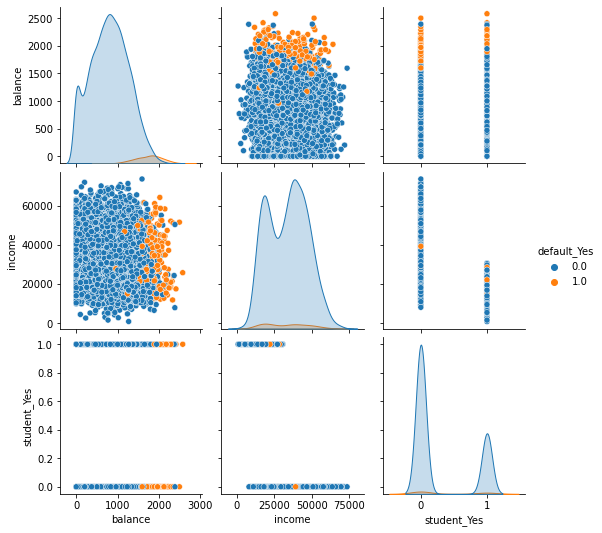

In [10]:
import seaborn as sns

sns.pairplot(train_dataset, hue='default_Yes');